# Entregable 3 - Analisis de la Marca Vanish

In [2]:
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sb
import os
import numpy as np

os.chdir("./")

import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings("ignore")

calendar = pd.read_excel("DIM_CALENDAR.xlsx")
product = pd.read_excel("DIM_PRODUCT.xlsx")
segment = pd.read_excel("DIM_SEGMENT.xlsx")
category = pd.read_csv("DIM_CATEGORY.csv")
sales = pd.read_csv("FACT_SALES.csv")

In [3]:
calendar.head()

,WEEK,YEAR,MONTH,WEEK_NUMBER,DATE
0,01-21,2021,1,1,2021-01-10
1,02-21,2021,1,2,2021-01-17
2,03-21,2021,1,3,2021-01-24
3,04-21,2021,1,4,2021-01-31
4,05-21,2021,2,5,2021-02-07


In [4]:
date = calendar.iloc[:, [0,1,2]] # Columnas Relevantes
print('Valores Nulos: \n', date.isnull().sum(), '\n')  # Chequeo de valores nulos
date.head()
date.info

Valores Nulos: 
 WEEK     0
YEAR     0
MONTH    0
dtype: int64 



<bound method DataFrame.info of       WEEK  YEAR  MONTH
0    01-21  2021      1
1    02-21  2021      1
2    03-21  2021      1
3    04-21  2021      1
4    05-21  2021      2
..     ...   ...    ...
151  48-23  2023     12
152  49-23  2023     12
153  50-23  2023     12
154  51-23  2023     12
155  52-23  2023      1

[156 rows x 3 columns]>

In [5]:
product.head()

,MANUFACTURER,BRAND,ITEM,ITEM_DESCRIPTION,CATEGORY,FORMAT,ATTR1,ATTR2,ATTR3
0,INDS. ALEN,CLORALEX,0000075000592,CLORALEX EL RENDIDOR BOT.PLAST. 250ML NAL. 000...,1,LIQUIDO,CLORO,CLORO,NO DEFINIDO
1,INDS. ALEN,CLORALEX,0000075000608,CLORALEX EL RENDIDOR BOT.PLAST. 500ML NAL. 000...,1,LIQUIDO,CLORO,CLORO,NO DEFINIDO
2,INDS. ALEN,CLORALEX,0000075000615,CLORALEX EL RENDIDOR BOT.PLAST. 950ML NAL. 000...,1,LIQUIDO,CLORO,CLORO,NO DEFINIDO
3,INDS. ALEN,CLORALEX,0000075000622,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,1,LIQUIDO,CLORO,CLORO,NO DEFINIDO
4,INDS. ALEN,CLORALEX,0000075000639,CLORALEX EL RENDIDOR BOT.PLAST. 3750ML NAL 000...,1,LIQUIDO,CLORO,CLORO,NO DEFINIDO


In [6]:
attributes = product.iloc[:, [2,4,5]]  # Columnas relevantes
print('Valores Nulos: \n', attributes.isnull().sum(), '\n')   #Chequeo de valores nulos
attributes.head()

Valores Nulos: 
 ITEM        2
CATEGORY    0
FORMAT      0
dtype: int64 



,ITEM,CATEGORY,FORMAT
0,0000075000592,1,LIQUIDO
1,0000075000608,1,LIQUIDO
2,0000075000615,1,LIQUIDO
3,0000075000622,1,LIQUIDO
4,0000075000639,1,LIQUIDO


In [7]:
description = product.iloc[:, [2,3]]
description

,ITEM,ITEM_DESCRIPTION
0,0000075000592,CLORALEX EL RENDIDOR BOT.PLAST. 250ML NAL. 000...
1,0000075000608,CLORALEX EL RENDIDOR BOT.PLAST. 500ML NAL. 000...
2,0000075000615,CLORALEX EL RENDIDOR BOT.PLAST. 950ML NAL. 000...
3,0000075000622,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...
4,0000075000639,CLORALEX EL RENDIDOR BOT.PLAST. 3750ML NAL 000...
...,...,...
500,7501058789778BP1,VANISH EXT HIGIENE REM MANCHAS GAL 4LT + VANIS...
501,7501025412142,CLORALEX AROMAS BLANQUEADOR C/AROMA LAVANDA GA...
502,NaN,CLORALEX EL RENDIDOR BOT PLAST 2LT
503,NaN,CLOROX MASCOTAS BLANQUEADOR+DETERGENTE GALON 10L


In [8]:
attributes = attributes.dropna(subset = ['ITEM'])  # Manejo de valores nulos
print('Valores Nulos: \n', attributes.isnull().sum(), '\n')

Valores Nulos: 
 ITEM        0
CATEGORY    0
FORMAT      0
dtype: int64 



In [9]:
description_item = pd.merge(attributes, description, on = "ITEM", how = 'inner')
description_item = description_item.iloc[: ,[0,3]]
description_item

,ITEM,ITEM_DESCRIPTION
0,0000075000592,CLORALEX EL RENDIDOR BOT.PLAST. 250ML NAL. 000...
1,0000075000608,CLORALEX EL RENDIDOR BOT.PLAST. 500ML NAL. 000...
2,0000075000615,CLORALEX EL RENDIDOR BOT.PLAST. 950ML NAL. 000...
3,0000075000622,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...
4,0000075000639,CLORALEX EL RENDIDOR BOT.PLAST. 3750ML NAL 000...
...,...,...
498,8411660210036,IBERIA REVOLUTION QUITA MANCHAS ACCIDENTALES B...
499,7501681101305BP1,BCLORHADA MASC DET DES C/CLOR1L+MM MASCHOGAR D...
500,7501058789778BP1,VANISH EXT HIGIENE REM MANCHAS GAL 4LT + VANIS...
501,7501025412142,CLORALEX AROMAS BLANQUEADOR C/AROMA LAVANDA GA...


In [10]:
segment.head()

,CATEGORY,ATTR1,ATTR2,ATTR3,FORMAT,SEGMENT
0,1,CLORO,CLORO,BAMBINO,LIQUIDO,BLEACH
1,1,CLORO,CLORO,GERMICIDA,LIQUIDO,BLEACH
2,1,CLORO,CLORO,MASCOTAS,LIQUIDO,BLEACH
3,1,CLORO,CLORO,MULTIUSOS,GEL,BLEACH
4,1,CLORO,CLORO,MULTIUSOS,LIQUIDO,BLEACH


In [11]:
formats = segment.iloc[:, [0,3]]  # Columnas relevantes
print('Valores Nulos: \n', formats.isnull().sum(), '\n')  # Chequeo de valores nulos
formats.head()

Valores Nulos: 
 CATEGORY    0
ATTR3       1
dtype: int64 



,CATEGORY,ATTR3
0,1,BAMBINO
1,1,GERMICIDA
2,1,MASCOTAS
3,1,MULTIUSOS
4,1,MULTIUSOS


In [12]:
formats.fillna({'ATTR3': 'NO DEFINIDO'}, inplace = True)  # Manejo de valores nulos. Valor renombrado
print('Valores Nulos: \n', formats.isnull().sum(), '\n')

Valores Nulos: 
 CATEGORY    0
ATTR3       0
dtype: int64 



In [13]:
category.head()

,ID_CATEGORY,CATEGORY
0,1,FABRIC TREATMENT and SANIT\r\n
1,2,AIR CARE
2,3,LAVAVAJILLAS
3,4,MEGA SUPERFICIES
4,5,LAVATORY CARE & BRC


In [14]:
id_category = category.iloc[:, [0, 1]]  # Columnas relevantes
print('Valores Nulos: \n', id_category.isnull().sum(), '\n')   # Chequeo de valores nulos
id_category = id_category.rename({'CATEGORY' : 'TYPE'}, axis = 'columns')   # Cambio de nombre de columna
id_category = id_category.rename({'ID_CATEGORY' : 'CATEGORY'}, axis = 'columns')   # Cambio de nombre de columna
id_category.at[0, 'TYPE'] = 'FABRIC TREATMENT & SANITIZER' #Corrección de Typo
id_category.head()

Valores Nulos: 
 ID_CATEGORY    0
CATEGORY       0
dtype: int64 



,CATEGORY,TYPE
0,1,FABRIC TREATMENT & SANITIZER
1,2,AIR CARE
2,3,LAVAVAJILLAS
3,4,MEGA SUPERFICIES
4,5,LAVATORY CARE & BRC


In [15]:
sales.head()

,WEEK,ITEM_CODE,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION
0,34-22,7501058792808BP2,0.006,0.139,1.000,TOTAL AUTOS AREA 5
1,34-22,7501058715883,0.487,116.519,2.916,TOTAL AUTOS AREA 5
2,34-22,7702626213774,1.391,68.453,5.171,TOTAL AUTOS AREA 5
3,34-22,7501058716422,0.022,1.481,1.833,TOTAL AUTOS AREA 5
4,34-22,7501058784353,2.037,182.839,5.375,TOTAL AUTOS AREA 5


In [16]:
total_sales = sales.iloc[:, [0,1,2,5]]   # Columnas relevantes
print('Valores Nulos: \n', total_sales.isnull().sum(), '\n')   # Chequeo de valores nulos
total_sales = total_sales.rename({'ITEM_CODE' : 'ITEM'}, axis = 'columns')   # Cambio de nombre a columna
total_sales.head()

Valores Nulos: 
 WEEK                0
ITEM_CODE           0
TOTAL_UNIT_SALES    0
REGION              0
dtype: int64 



,WEEK,ITEM,TOTAL_UNIT_SALES,REGION
0,34-22,7501058792808BP2,0.006,TOTAL AUTOS AREA 5
1,34-22,7501058715883,0.487,TOTAL AUTOS AREA 5
2,34-22,7702626213774,1.391,TOTAL AUTOS AREA 5
3,34-22,7501058716422,0.022,TOTAL AUTOS AREA 5
4,34-22,7501058784353,2.037,TOTAL AUTOS AREA 5


# Unión de DataFrames

In [18]:
date_sales = pd.merge(date, total_sales, on = 'WEEK', how = 'inner')
date_sales.head()

,WEEK,YEAR,MONTH,ITEM,TOTAL_UNIT_SALES,REGION
0,01-22,2022,1,7501268200001,0.003,TOTAL AUTOS AREA 1
1,01-22,2022,1,7501268200049,0.006,TOTAL AUTOS AREA 1
2,01-22,2022,1,7501268200070,0.044,TOTAL AUTOS AREA 1
3,01-22,2022,1,0757037517123,0.639,TOTAL AUTOS AREA 1
4,01-22,2022,1,7501080954786,1.306,TOTAL AUTOS AREA 1


In [19]:
date_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122002 entries, 0 to 122001
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   WEEK              122002 non-null  object 
 1   YEAR              122002 non-null  int64  
 2   MONTH             122002 non-null  int64  
 3   ITEM              122002 non-null  object 
 4   TOTAL_UNIT_SALES  122002 non-null  float64
 5   REGION            122002 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 5.6+ MB


In [20]:
attributes_sales_date = pd.merge(date_sales, attributes, on = 'ITEM', how = 'inner')
attributes_sales_date.head()

,WEEK,YEAR,MONTH,ITEM,TOTAL_UNIT_SALES,REGION,CATEGORY,FORMAT
0,01-22,2022,1,7501268200001,0.003,TOTAL AUTOS AREA 1,1,LIQUIDO
1,01-22,2022,1,7501268200049,0.006,TOTAL AUTOS AREA 1,1,LIQUIDO
2,01-22,2022,1,7501268200070,0.044,TOTAL AUTOS AREA 1,1,LIQUIDO
3,01-22,2022,1,0757037517123,0.639,TOTAL AUTOS AREA 1,1,LIQUIDO
4,01-22,2022,1,7501080954786,1.306,TOTAL AUTOS AREA 1,1,GEL


In [21]:
attributes_sales_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122002 entries, 0 to 122001
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   WEEK              122002 non-null  object 
 1   YEAR              122002 non-null  int64  
 2   MONTH             122002 non-null  int64  
 3   ITEM              122002 non-null  object 
 4   TOTAL_UNIT_SALES  122002 non-null  float64
 5   REGION            122002 non-null  object 
 6   CATEGORY          122002 non-null  int64  
 7   FORMAT            122002 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 7.4+ MB


In [22]:
formats_attributes_sales_date = pd.merge(attributes_sales_date, formats, on = 'CATEGORY', how = 'inner')
formats_attributes_sales_date.head()

,WEEK,YEAR,MONTH,ITEM,TOTAL_UNIT_SALES,REGION,CATEGORY,FORMAT,ATTR3
0,01-22,2022,1,7501268200001,0.003,TOTAL AUTOS AREA 1,1,LIQUIDO,BAMBINO
1,01-22,2022,1,7501268200001,0.003,TOTAL AUTOS AREA 1,1,LIQUIDO,GERMICIDA
2,01-22,2022,1,7501268200001,0.003,TOTAL AUTOS AREA 1,1,LIQUIDO,MASCOTAS
3,01-22,2022,1,7501268200001,0.003,TOTAL AUTOS AREA 1,1,LIQUIDO,MULTIUSOS
4,01-22,2022,1,7501268200001,0.003,TOTAL AUTOS AREA 1,1,LIQUIDO,MULTIUSOS


In [23]:
formats_attributes_sales_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6466106 entries, 0 to 6466105
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   WEEK              object 
 1   YEAR              int64  
 2   MONTH             int64  
 3   ITEM              object 
 4   TOTAL_UNIT_SALES  float64
 5   REGION            object 
 6   CATEGORY          int64  
 7   FORMAT            object 
 8   ATTR3             object 
dtypes: float64(1), int64(3), object(5)
memory usage: 444.0+ MB


In [24]:
type_formats_attr_sales = pd.merge(formats_attributes_sales_date, id_category, on = "CATEGORY", how = 'inner')
type_formats_attr_sales.head()

,WEEK,YEAR,MONTH,ITEM,TOTAL_UNIT_SALES,REGION,CATEGORY,FORMAT,ATTR3,TYPE
0,01-22,2022,1,7501268200001,0.003,TOTAL AUTOS AREA 1,1,LIQUIDO,BAMBINO,FABRIC TREATMENT & SANITIZER
1,01-22,2022,1,7501268200001,0.003,TOTAL AUTOS AREA 1,1,LIQUIDO,GERMICIDA,FABRIC TREATMENT & SANITIZER
2,01-22,2022,1,7501268200001,0.003,TOTAL AUTOS AREA 1,1,LIQUIDO,MASCOTAS,FABRIC TREATMENT & SANITIZER
3,01-22,2022,1,7501268200001,0.003,TOTAL AUTOS AREA 1,1,LIQUIDO,MULTIUSOS,FABRIC TREATMENT & SANITIZER
4,01-22,2022,1,7501268200001,0.003,TOTAL AUTOS AREA 1,1,LIQUIDO,MULTIUSOS,FABRIC TREATMENT & SANITIZER


In [25]:
type_formats_attr_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6466106 entries, 0 to 6466105
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   WEEK              object 
 1   YEAR              int64  
 2   MONTH             int64  
 3   ITEM              object 
 4   TOTAL_UNIT_SALES  float64
 5   REGION            object 
 6   CATEGORY          int64  
 7   FORMAT            object 
 8   ATTR3             object 
 9   TYPE              object 
dtypes: float64(1), int64(3), object(6)
memory usage: 493.3+ MB


# Preprocesamiento de Variables

In [27]:
print('Regiones: \n', type_formats_attr_sales['REGION'].unique(), '\n')
print('Formatos: \n', type_formats_attr_sales['FORMAT'].unique(), '\n')
print('Atributos: \n', type_formats_attr_sales['ATTR3'].unique(), '\n')
print('Tipos: \n', type_formats_attr_sales['TYPE'].unique(), '\n')

Regiones: 
 ['TOTAL AUTOS AREA 1' 'TOTAL AUTOS AREA 6' 'TOTAL AUTOS SCANNING MEXICO'
 'TOTAL AUTOS AREA 2' 'TOTAL AUTOS AREA 3' 'TOTAL AUTOS AREA 4'
 'TOTAL AUTOS AREA 5'] 

Formatos: 
 ['LIQUIDO' 'GEL' 'POLVO' 'BARRA' 'TOALLAS'] 

Atributos: 
 ['BAMBINO' 'GERMICIDA' 'MASCOTAS' 'MULTIUSOS' 'NO DEFINIDO' 'OTR. TIPOS'
 'ROPA BEBE' 'BLANCO' 'PRE LAVADOR' 'QUITAMANCHAS' 'ROPA COLOR' 'ROSA'
 'COLOR PODER VINAGRE' 'PODER OXIGENO' 'ROPA BLANCA' 'SANITIZANTE'] 

Tipos: 
 ['FABRIC TREATMENT & SANITIZER'] 



In [28]:
from sklearn import preprocessing

data_labeled = type_formats_attr_sales

region_labels = preprocessing.LabelEncoder() # Regiones
region_labels.fit(['TOTAL AUTOS AREA 1', 'TOTAL AUTOS AREA 6', 'TOTAL AUTOS SCANNING MEXICO',
                  'TOTAL AUTOS AREA 2', 'TOTAL AUTOS AREA 3', 'TOTAL AUTOS AREA 4', 'TOTAL AUTOS AREA 5'])

data_labeled['REGION'] = region_labels.transform(data_labeled['REGION'])

format_labels = preprocessing.LabelEncoder() # Formatos
format_labels.fit(['LIQUIDO', 'GEL', 'POLVO', 'BARRA', 'TOALLAS'])

data_labeled['FORMAT'] = format_labels.transform(data_labeled['FORMAT'])

attr_labels = preprocessing.LabelEncoder() # Atributos
attr_labels.fit(['BAMBINO', 'GERMICIDA', 'MASCOTAS', 'MULTIUSOS', 'NO DEFINIDO', 'OTR. TIPOS',
                  'ROPA BEBE', 'BLANCO', 'PRE LAVADOR', 'QUITAMANCHAS', 'ROPA COLOR', 'ROSA',
                'COLOR PODER VINAGRE', 'PODER OXIGENO', 'ROPA BLANCA', 'SANITIZANTE'])

data_labeled['ATTR3'] = attr_labels.transform(data_labeled['ATTR3'])

type_labels = preprocessing.LabelEncoder() # Tipos
type_labels.fit(['FABRIC TREATMENT & SANITIZER'])

data_labeled['TYPE'] = type_labels.transform(data_labeled['TYPE'])

In [29]:
data_labeled.head()

,WEEK,YEAR,MONTH,ITEM,TOTAL_UNIT_SALES,REGION,CATEGORY,FORMAT,ATTR3,TYPE
0,01-22,2022,1,7501268200001,0.003,0,1,2,0,0
1,01-22,2022,1,7501268200001,0.003,0,1,2,3,0
2,01-22,2022,1,7501268200001,0.003,0,1,2,4,0
3,01-22,2022,1,7501268200001,0.003,0,1,2,5,0
4,01-22,2022,1,7501268200001,0.003,0,1,2,5,0


In [30]:
item = data_labeled['ITEM']
item

0          7501268200001
1          7501268200001
2          7501268200001
3          7501268200001
4          7501268200001
               ...      
6466101    7501058757449
6466102    7501058757449
6466103    7501058757449
6466104    7501058757449
6466105    7501058757449
Name: ITEM, Length: 6466106, dtype: object

In [31]:
variables = data_labeled.drop(['ITEM', 'WEEK'], axis = 1)
variables

,YEAR,MONTH,TOTAL_UNIT_SALES,REGION,CATEGORY,FORMAT,ATTR3,TYPE
0,2022,1,0.003,0,1,2,0,0
1,2022,1,0.003,0,1,2,3,0
2,2022,1,0.003,0,1,2,4,0
3,2022,1,0.003,0,1,2,5,0
4,2022,1,0.003,0,1,2,5,0
...,...,...,...,...,...,...,...,...
6466101,2023,7,1.729,6,1,3,14,0
6466102,2023,7,1.729,6,1,3,14,0
6466103,2023,7,1.729,6,1,3,14,0
6466104,2023,7,1.729,6,1,3,9,0


# Escalado de variables

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

variables = pd.DataFrame(scaler.fit_transform(variables), columns = variables.columns)

variables

,YEAR,MONTH,TOTAL_UNIT_SALES,REGION,CATEGORY,FORMAT,ATTR3,TYPE
0,-0.708798,-1.409734,-0.221310,-1.524665,0.0,0.127895,-1.753772,0.0
1,-0.708798,-1.409734,-0.221310,-1.524665,0.0,0.127895,-1.070317,0.0
2,-0.708798,-1.409734,-0.221310,-1.524665,0.0,0.127895,-0.842499,0.0
3,-0.708798,-1.409734,-0.221310,-1.524665,0.0,0.127895,-0.614680,0.0
4,-0.708798,-1.409734,-0.221310,-1.524665,0.0,0.127895,-0.614680,0.0
...,...,...,...,...,...,...,...,...
6466101,1.410838,0.456751,-0.102242,1.427222,0.0,1.520062,1.435686,0.0
6466102,1.410838,0.456751,-0.102242,1.427222,0.0,1.520062,1.435686,0.0
6466103,1.410838,0.456751,-0.102242,1.427222,0.0,1.520062,1.435686,0.0
6466104,1.410838,0.456751,-0.102242,1.427222,0.0,1.520062,0.296594,0.0


# Graficación del Codo de Jambu para determinación de Clusters Óptimos

In [35]:
wcss = []

for index in range(1,11):
    kmeans = KMeans(n_clusters = index, init = 'k-means++', random_state = 2)
    kmeans.fit(variables)

    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

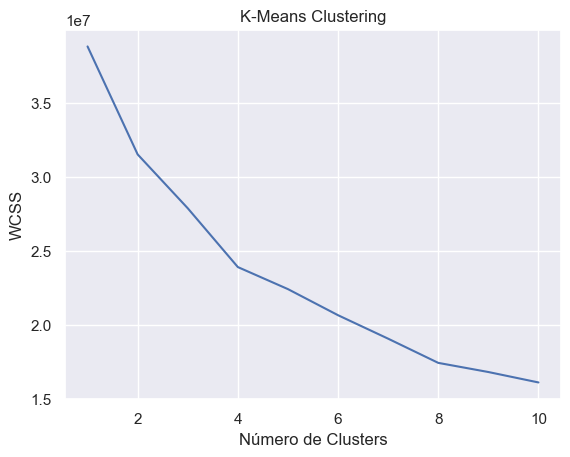

In [36]:
# Graficación del "Codo de Jambu"
sb.set()
mp.plot(range(1,11), wcss)
mp.title("K-Means Clustering")
mp.xlabel("Número de Clusters")
mp.ylabel("WCSS") # Weighted Cluster sum of squares

In [37]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 2)
cluster_values = kmeans.fit_predict(variables)
print(cluster_values)

[2 2 2 ... 1 1 1]


In [38]:
print(np.unique(cluster_values))

[0 1 2 3]


In [39]:
agrupacion = pd.DataFrame(cluster_values, columns = ["Grupo"])
agrupacion = pd.concat([variables, agrupacion], axis = 1, join = "inner")
agrupacion

,YEAR,MONTH,TOTAL_UNIT_SALES,REGION,CATEGORY,FORMAT,ATTR3,TYPE,Grupo
0,-0.708798,-1.409734,-0.221310,-1.524665,0.0,0.127895,-1.753772,0.0,2
1,-0.708798,-1.409734,-0.221310,-1.524665,0.0,0.127895,-1.070317,0.0,2
2,-0.708798,-1.409734,-0.221310,-1.524665,0.0,0.127895,-0.842499,0.0,2
3,-0.708798,-1.409734,-0.221310,-1.524665,0.0,0.127895,-0.614680,0.0,2
4,-0.708798,-1.409734,-0.221310,-1.524665,0.0,0.127895,-0.614680,0.0,2
...,...,...,...,...,...,...,...,...,...
6466101,1.410838,0.456751,-0.102242,1.427222,0.0,1.520062,1.435686,0.0,1
6466102,1.410838,0.456751,-0.102242,1.427222,0.0,1.520062,1.435686,0.0,1
6466103,1.410838,0.456751,-0.102242,1.427222,0.0,1.520062,1.435686,0.0,1
6466104,1.410838,0.456751,-0.102242,1.427222,0.0,1.520062,0.296594,0.0,1


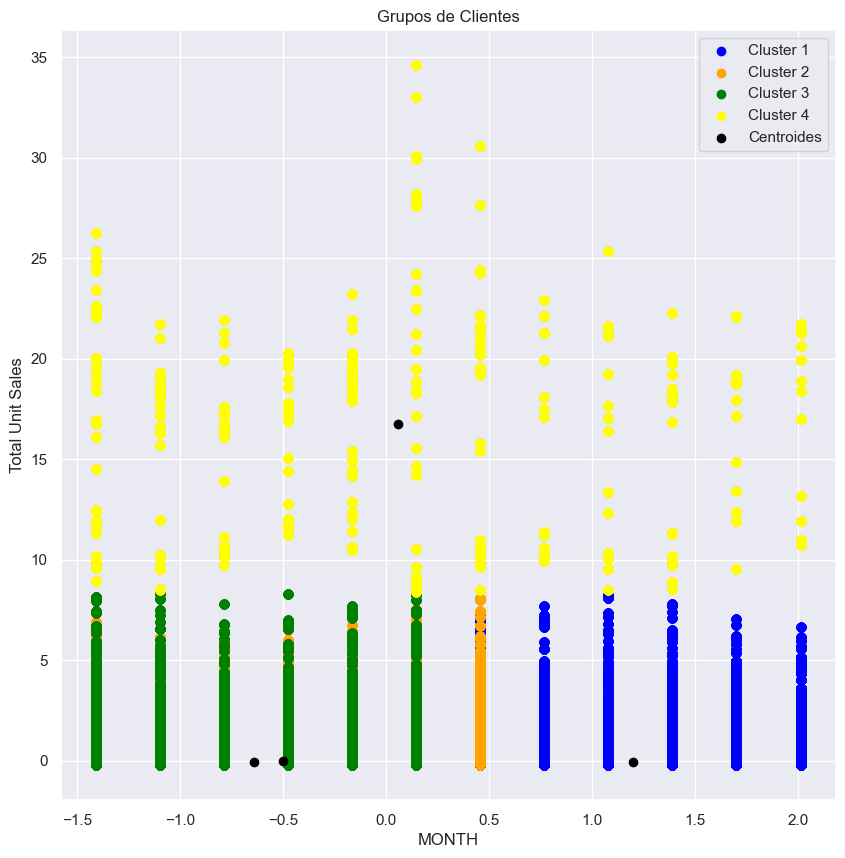

In [40]:
mp.figure(figsize = (10,10))
for i, color in enumerate(["blue", "orange", "green", "yellow"]):
    mp.scatter(variables.loc[cluster_values == i, 'MONTH'],
               variables.loc[cluster_values == i, 'TOTAL_UNIT_SALES'],
               c=color, label=f"Cluster {i+1}")

mp.scatter(kmeans.cluster_centers_[:, variables.columns.get_loc('MONTH')],
           kmeans.cluster_centers_[:, variables.columns.get_loc('TOTAL_UNIT_SALES')],
           c='black', label='Centroides')

mp.title("Grupos de Clientes")
mp.xlabel('MONTH')
mp.ylabel('Total Unit Sales')
mp.legend()

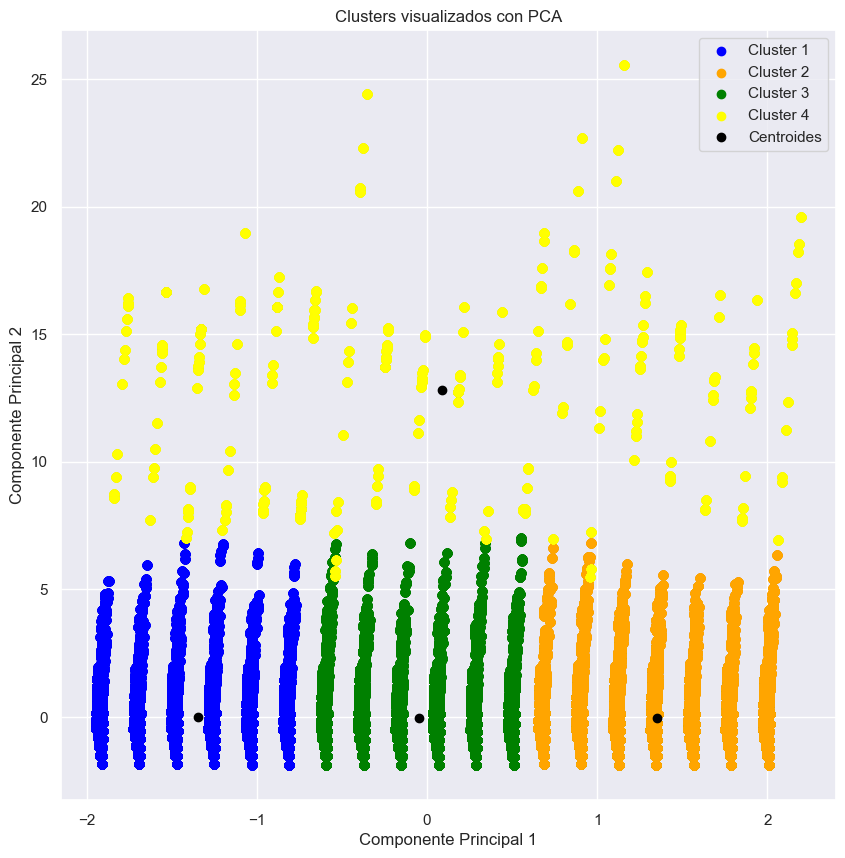

In [41]:
# Conversión con PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(variables)

# Graficar
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
colors = ["blue", "orange", "green", "yellow", "red", "purple", "#2ca02c", "magenta"]

for i in range(len(set(cluster_values))):  # cluster_values = kmeans.labels_
    plt.scatter(X_pca[cluster_values == i, 0],
                X_pca[cluster_values == i, 1],
                c=colors[i], label=f"Cluster {i+1}")

# Centroides proyectados (opcional)
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='black', marker='o', label='Centroides')

plt.title("Clusters visualizados con PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.grid(True)
plt.show()

# Analisis de Grupos

In [43]:
agrupacion_final = pd.DataFrame(cluster_values, columns = ["GROUP"])

agrupacion_final = pd.concat([type_formats_attr_sales, agrupacion_final], axis = 1, join = "inner")
agrupacion_final = pd.merge(agrupacion_final, description_item, on = 'ITEM', how = 'inner')

agrupacion_final['ATTR3'] = attr_labels.inverse_transform(type_formats_attr_sales['ATTR3'])
agrupacion_final['REGION'] = region_labels.inverse_transform(type_formats_attr_sales['REGION'])
agrupacion_final['FORMAT'] = format_labels.inverse_transform(type_formats_attr_sales['FORMAT'])

agrupacion_final.to_csv('AgrupacionFinal_Entregable3.csv', index=False) 

agrupacion_final.head()

,WEEK,YEAR,MONTH,ITEM,TOTAL_UNIT_SALES,REGION,CATEGORY,FORMAT,ATTR3,TYPE,GROUP,ITEM_DESCRIPTION
0,01-22,2022,1,7501268200001,0.003,TOTAL AUTOS AREA 1,1,LIQUIDO,BAMBINO,0,2,LA VALENCIANA BOT.PLAST. 1000ML NAL. 750126820...
1,01-22,2022,1,7501268200001,0.003,TOTAL AUTOS AREA 1,1,LIQUIDO,GERMICIDA,0,2,LA VALENCIANA BOT.PLAST. 1000ML NAL. 750126820...
2,01-22,2022,1,7501268200001,0.003,TOTAL AUTOS AREA 1,1,LIQUIDO,MASCOTAS,0,2,LA VALENCIANA BOT.PLAST. 1000ML NAL. 750126820...
3,01-22,2022,1,7501268200001,0.003,TOTAL AUTOS AREA 1,1,LIQUIDO,MULTIUSOS,0,2,LA VALENCIANA BOT.PLAST. 1000ML NAL. 750126820...
4,01-22,2022,1,7501268200001,0.003,TOTAL AUTOS AREA 1,1,LIQUIDO,MULTIUSOS,0,2,LA VALENCIANA BOT.PLAST. 1000ML NAL. 750126820...


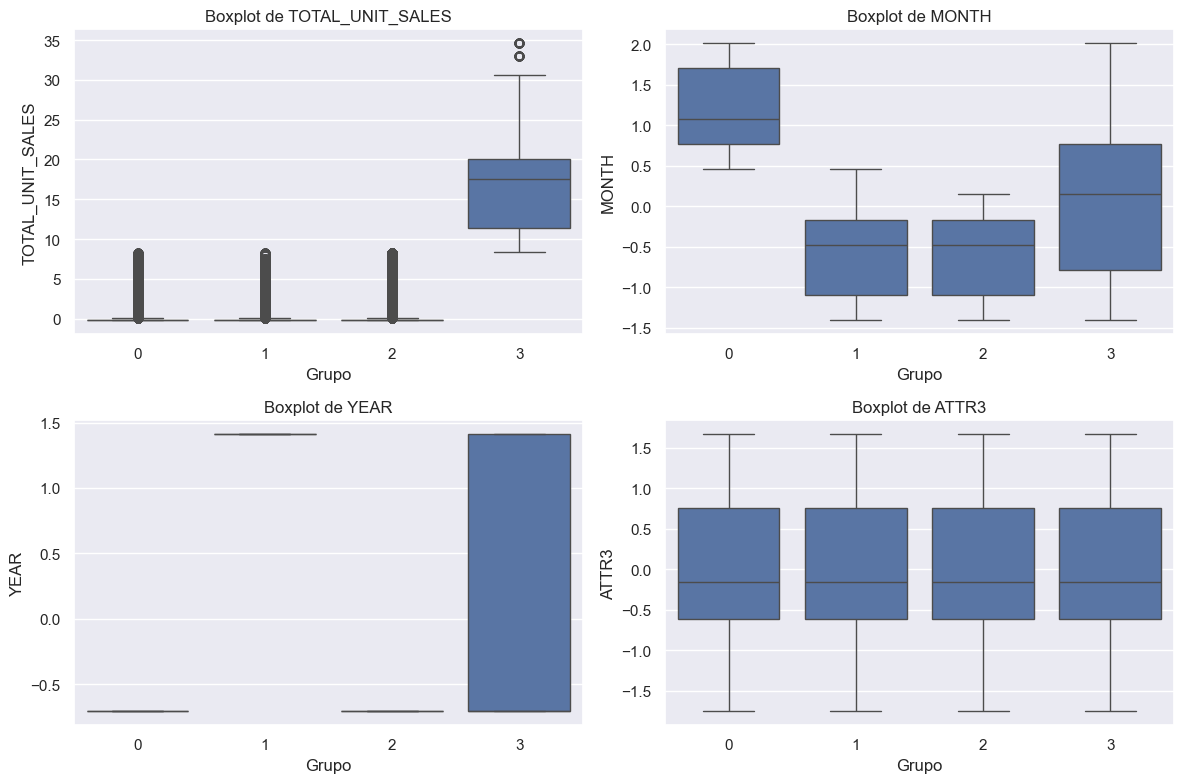

In [44]:
variables_de_analisis = ['TOTAL_UNIT_SALES', 'MONTH', 'YEAR', 'ATTR3']

# Grid de 2x2 subplots
fig, axes = plt.subplots(2,2, figsize=(12, 8))
axes = axes.flatten()

for i, var in enumerate(variables_de_analisis):
    sb.boxplot(data=agrupacion, x='Grupo', y=var, ax=axes[i])
    axes[i].set_title(f"Boxplot de {var}")
    
plt.tight_layout()
plt.show()

In [45]:
grupo_3 = agrupacion_final[agrupacion_final['GROUP'] == 3]
grupo_3.head()

,WEEK,YEAR,MONTH,ITEM,TOTAL_UNIT_SALES,REGION,CATEGORY,FORMAT,ATTR3,TYPE,GROUP,ITEM_DESCRIPTION
32118,01-22,2022,1,0000075000622,371.038,TOTAL AUTOS SCANNING MEXICO,1,LIQUIDO,BAMBINO,0,3,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...
32119,01-22,2022,1,0000075000622,371.038,TOTAL AUTOS SCANNING MEXICO,1,LIQUIDO,GERMICIDA,0,3,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...
32120,01-22,2022,1,0000075000622,371.038,TOTAL AUTOS SCANNING MEXICO,1,LIQUIDO,MASCOTAS,0,3,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...
32121,01-22,2022,1,0000075000622,371.038,TOTAL AUTOS SCANNING MEXICO,1,LIQUIDO,MULTIUSOS,0,3,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...
32122,01-22,2022,1,0000075000622,371.038,TOTAL AUTOS SCANNING MEXICO,1,LIQUIDO,MULTIUSOS,0,3,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...


In [47]:
vanish_data = agrupacion_final[agrupacion_final['ITEM_DESCRIPTION'].str.contains('VANISH', case=False, na=False)]
vanish_data.head()

,WEEK,YEAR,MONTH,ITEM,TOTAL_UNIT_SALES,REGION,CATEGORY,FORMAT,ATTR3,TYPE,GROUP,ITEM_DESCRIPTION
901,01-22,2022,1,7501058716422,0.033,TOTAL AUTOS AREA 6,1,POLVO,BAMBINO,0,2,VANISH OXI ACTION GOLD QUITAMANCHA AHORRO DEL ...
902,01-22,2022,1,7501058716422,0.033,TOTAL AUTOS AREA 6,1,POLVO,GERMICIDA,0,2,VANISH OXI ACTION GOLD QUITAMANCHA AHORRO DEL ...
903,01-22,2022,1,7501058716422,0.033,TOTAL AUTOS AREA 6,1,POLVO,MASCOTAS,0,2,VANISH OXI ACTION GOLD QUITAMANCHA AHORRO DEL ...
904,01-22,2022,1,7501058716422,0.033,TOTAL AUTOS AREA 6,1,POLVO,MULTIUSOS,0,2,VANISH OXI ACTION GOLD QUITAMANCHA AHORRO DEL ...
905,01-22,2022,1,7501058716422,0.033,TOTAL AUTOS AREA 6,1,POLVO,MULTIUSOS,0,2,VANISH OXI ACTION GOLD QUITAMANCHA AHORRO DEL ...


In [48]:
vanish_data['GROUP'].unique()

array([2, 0, 1], dtype=int32)

In [49]:
grupo_0 = agrupacion_final[agrupacion_final['GROUP'] == 0]
grupo_0.head()

,WEEK,YEAR,MONTH,ITEM,TOTAL_UNIT_SALES,REGION,CATEGORY,FORMAT,ATTR3,TYPE,GROUP,ITEM_DESCRIPTION
2131183,26-22,2022,7,7501071904103,0.055,TOTAL AUTOS AREA 2,1,LIQUIDO,BAMBINO,0,0,CLOROX BLANCOS INTENSOS QUITAMANCHAS BOTELLA 9...
2131184,26-22,2022,7,7501071904103,0.055,TOTAL AUTOS AREA 2,1,LIQUIDO,GERMICIDA,0,0,CLOROX BLANCOS INTENSOS QUITAMANCHAS BOTELLA 9...
2131185,26-22,2022,7,7501071904103,0.055,TOTAL AUTOS AREA 2,1,LIQUIDO,MASCOTAS,0,0,CLOROX BLANCOS INTENSOS QUITAMANCHAS BOTELLA 9...
2131186,26-22,2022,7,7501071904103,0.055,TOTAL AUTOS AREA 2,1,LIQUIDO,MULTIUSOS,0,0,CLOROX BLANCOS INTENSOS QUITAMANCHAS BOTELLA 9...
2131187,26-22,2022,7,7501071904103,0.055,TOTAL AUTOS AREA 2,1,LIQUIDO,MULTIUSOS,0,0,CLOROX BLANCOS INTENSOS QUITAMANCHAS BOTELLA 9...


In [50]:
grupo_2 = agrupacion_final[agrupacion_final['GROUP'] == 2]
grupo_2.head()

,WEEK,YEAR,MONTH,ITEM,TOTAL_UNIT_SALES,REGION,CATEGORY,FORMAT,ATTR3,TYPE,GROUP,ITEM_DESCRIPTION
0,01-22,2022,1,7501268200001,0.003,TOTAL AUTOS AREA 1,1,LIQUIDO,BAMBINO,0,2,LA VALENCIANA BOT.PLAST. 1000ML NAL. 750126820...
1,01-22,2022,1,7501268200001,0.003,TOTAL AUTOS AREA 1,1,LIQUIDO,GERMICIDA,0,2,LA VALENCIANA BOT.PLAST. 1000ML NAL. 750126820...
2,01-22,2022,1,7501268200001,0.003,TOTAL AUTOS AREA 1,1,LIQUIDO,MASCOTAS,0,2,LA VALENCIANA BOT.PLAST. 1000ML NAL. 750126820...
3,01-22,2022,1,7501268200001,0.003,TOTAL AUTOS AREA 1,1,LIQUIDO,MULTIUSOS,0,2,LA VALENCIANA BOT.PLAST. 1000ML NAL. 750126820...
4,01-22,2022,1,7501268200001,0.003,TOTAL AUTOS AREA 1,1,LIQUIDO,MULTIUSOS,0,2,LA VALENCIANA BOT.PLAST. 1000ML NAL. 750126820...


In [51]:
grupo_1 = agrupacion_final[agrupacion_final['GROUP'] == 1]
grupo_1.head()

,WEEK,YEAR,MONTH,ITEM,TOTAL_UNIT_SALES,REGION,CATEGORY,FORMAT,ATTR3,TYPE,GROUP,ITEM_DESCRIPTION
4303865,01-23,2023,1,7501268200070,0.003,TOTAL AUTOS AREA 1,1,LIQUIDO,BAMBINO,0,1,LOS PATITOS BOT.PLAST. 4000 MLNAL. 7501268200070
4303866,01-23,2023,1,7501268200070,0.003,TOTAL AUTOS AREA 1,1,LIQUIDO,GERMICIDA,0,1,LOS PATITOS BOT.PLAST. 4000 MLNAL. 7501268200070
4303867,01-23,2023,1,7501268200070,0.003,TOTAL AUTOS AREA 1,1,LIQUIDO,MASCOTAS,0,1,LOS PATITOS BOT.PLAST. 4000 MLNAL. 7501268200070
4303868,01-23,2023,1,7501268200070,0.003,TOTAL AUTOS AREA 1,1,LIQUIDO,MULTIUSOS,0,1,LOS PATITOS BOT.PLAST. 4000 MLNAL. 7501268200070
4303869,01-23,2023,1,7501268200070,0.003,TOTAL AUTOS AREA 1,1,LIQUIDO,MULTIUSOS,0,1,LOS PATITOS BOT.PLAST. 4000 MLNAL. 7501268200070


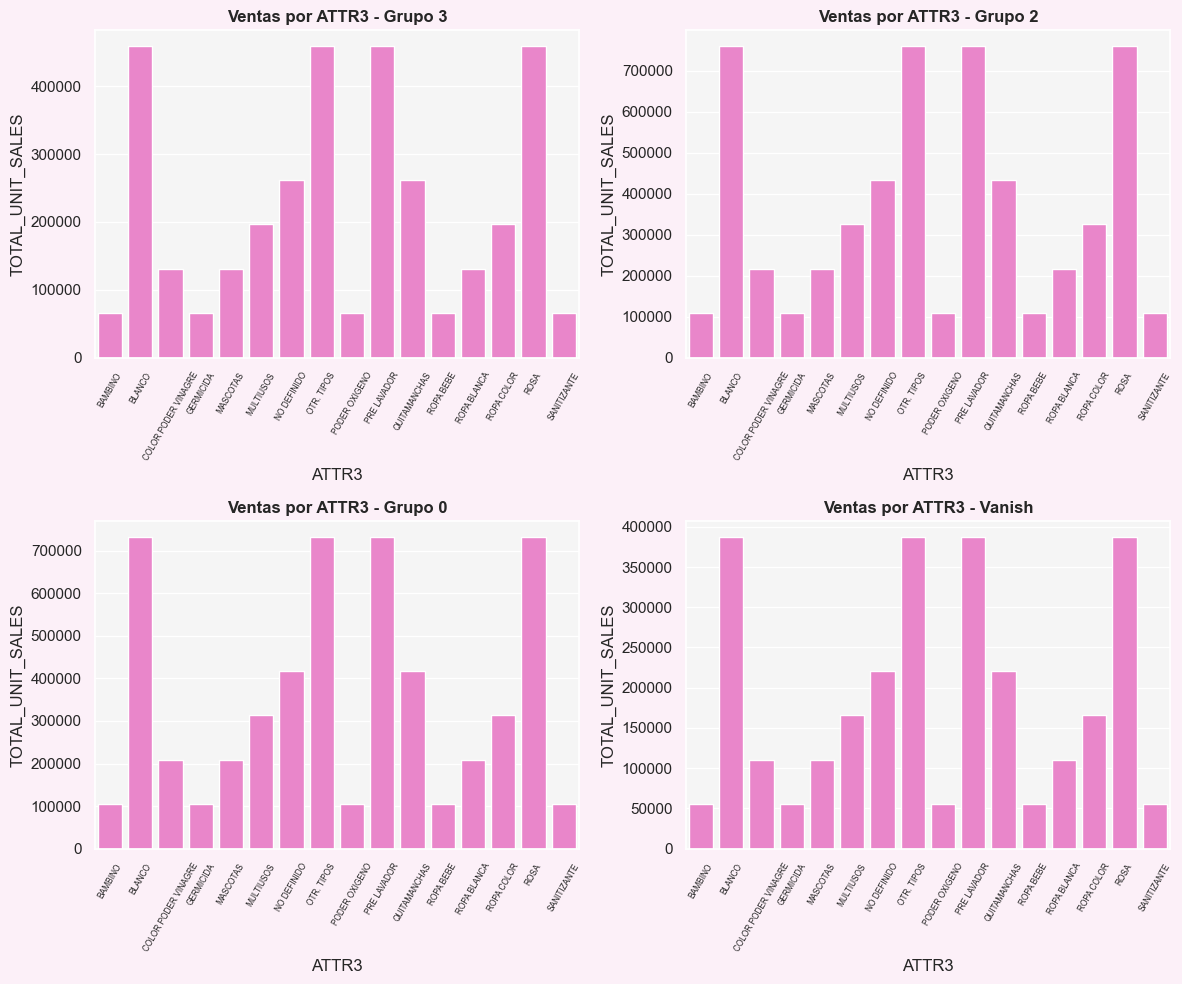

In [104]:
# Graficacion de Ventas por Grupo en base al Atributo 3

# Agrupar y sumar TOTAL_UNIT_SALES por ATTR3
ventas_grupo3 = grupo_3.groupby('ATTR3')['TOTAL_UNIT_SALES'].sum().reset_index()
ventas_grupo2 = grupo_2.groupby('ATTR3')['TOTAL_UNIT_SALES'].sum().reset_index()
ventas_grupo0 = grupo_0.groupby('ATTR3')['TOTAL_UNIT_SALES'].sum().reset_index()
ventas_vanish = vanish_data.groupby('ATTR3')['TOTAL_UNIT_SALES'].sum().reset_index()

variables_ventas = [ventas_grupo3, ventas_grupo2, ventas_grupo0, ventas_vanish]
titulos = ["Grupo 3", "Grupo 2", "Grupo 0", "Vanish"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.patch.set_facecolor('#fcf0f8')
axes = axes.flatten()

for i, var in enumerate(variables_ventas):
    sb.barplot(data=var, x='ATTR3', y='TOTAL_UNIT_SALES', color='#fa75d0', ax=axes[i])
    axes[i].set_title(f"Ventas por ATTR3 - {titulos[i]}", fontweight='bold')
    axes[i].tick_params(axis='x', rotation=60, labelsize=6)
    axes[i].set_facecolor('#f5f5f5')

plt.tight_layout()
plt.show()

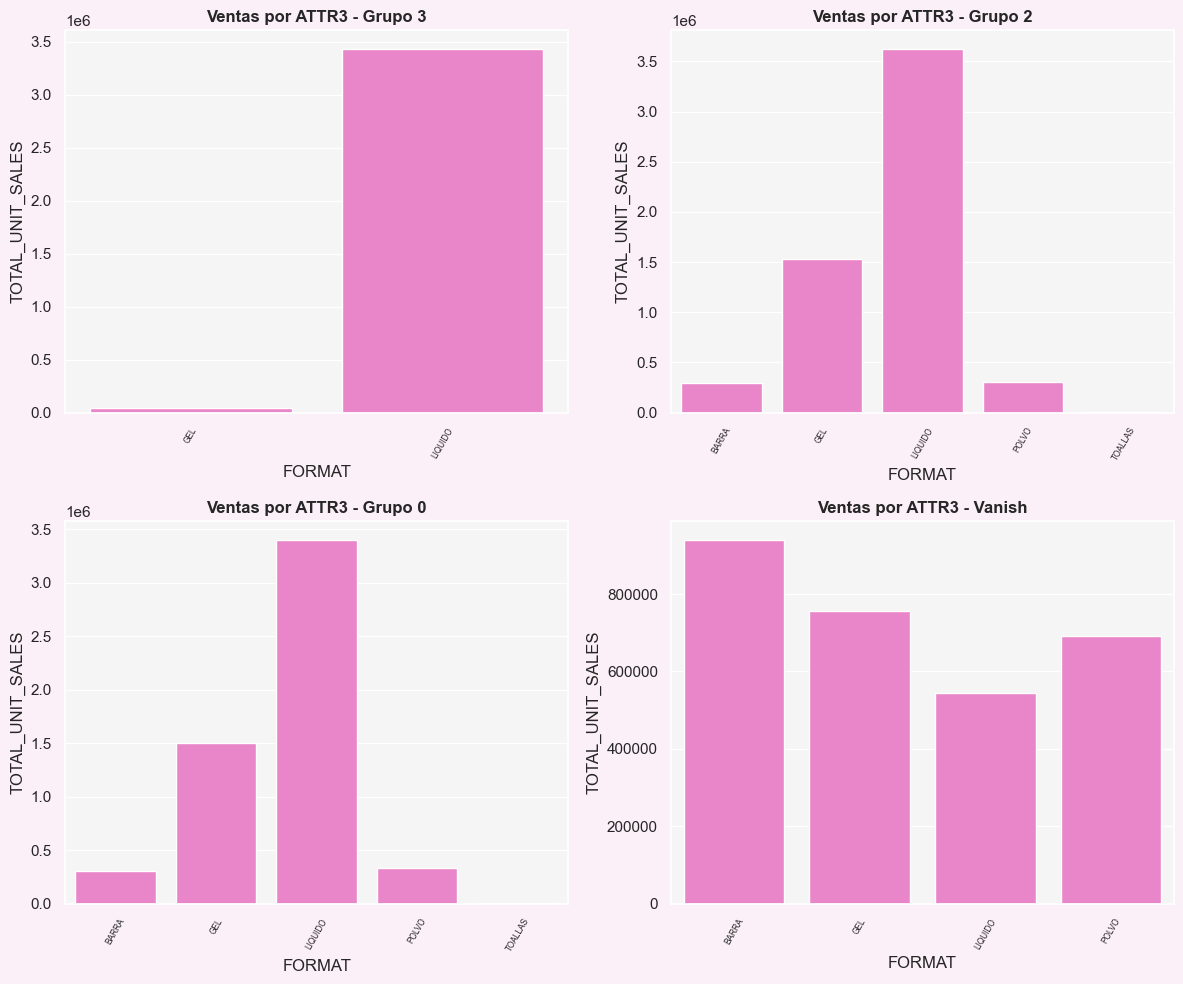

In [108]:
# Graficacion de Ventas por Grupo en base al formato

# Agrupar y sumar TOTAL_UNIT_SALES por ATTR3
ventas_grupo3 = grupo_3.groupby('FORMAT')['TOTAL_UNIT_SALES'].sum().reset_index()
ventas_grupo2 = grupo_2.groupby('FORMAT')['TOTAL_UNIT_SALES'].sum().reset_index()
ventas_grupo0 = grupo_0.groupby('FORMAT')['TOTAL_UNIT_SALES'].sum().reset_index()
ventas_vanish = vanish_data.groupby('FORMAT')['TOTAL_UNIT_SALES'].sum().reset_index()

variables_ventas = [ventas_grupo3, ventas_grupo2, ventas_grupo0, ventas_vanish]
titulos = ["Grupo 3", "Grupo 2", "Grupo 0", "Vanish"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.patch.set_facecolor('#fcf0f8')
axes = axes.flatten()

for i, var in enumerate(variables_ventas):
    sb.barplot(data=var, x='FORMAT', y='TOTAL_UNIT_SALES', color='#fa75d0', ax=axes[i])
    axes[i].set_title(f"Ventas por ATTR3 - {titulos[i]}", fontweight='bold')
    axes[i].tick_params(axis='x', rotation=60, labelsize=6)
    axes[i].set_facecolor('#f5f5f5')

plt.tight_layout()
plt.show()

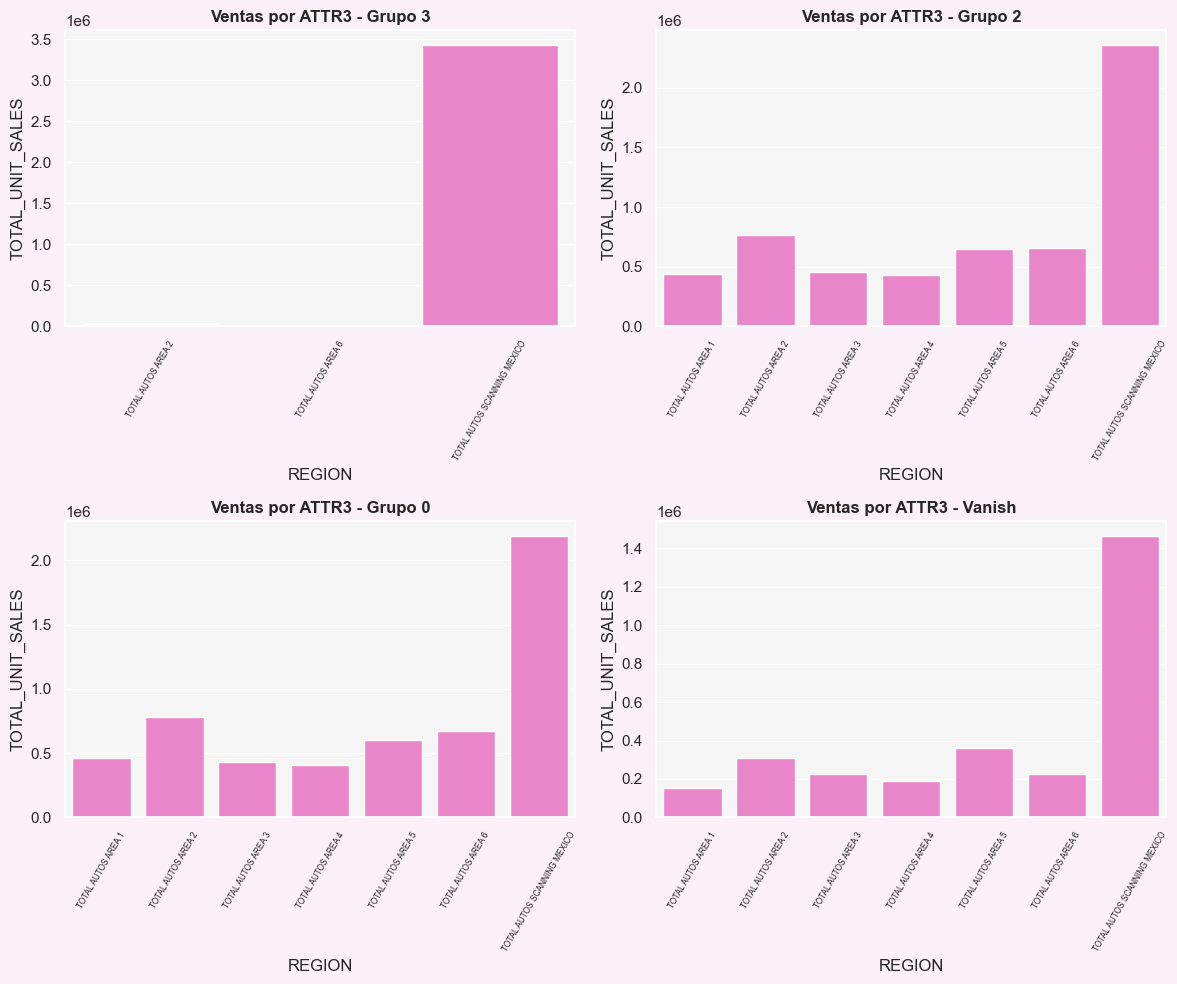

In [106]:
# Graficacion de Ventas por Grupo en base a la region

# Agrupar y sumar TOTAL_UNIT_SALES por ATTR3
ventas_grupo3 = grupo_3.groupby('REGION')['TOTAL_UNIT_SALES'].sum().reset_index()
ventas_grupo2 = grupo_2.groupby('REGION')['TOTAL_UNIT_SALES'].sum().reset_index()
ventas_grupo0 = grupo_0.groupby('REGION')['TOTAL_UNIT_SALES'].sum().reset_index()
ventas_vanish = vanish_data.groupby('REGION')['TOTAL_UNIT_SALES'].sum().reset_index()

variables_ventas = [ventas_grupo3, ventas_grupo2, ventas_grupo0, ventas_vanish]
titulos = ["Grupo 3", "Grupo 2", "Grupo 0", "Vanish"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.patch.set_facecolor('#fcf0f8')
axes = axes.flatten()

for i, var in enumerate(variables_ventas):
    sb.barplot(data=var, x='REGION', y='TOTAL_UNIT_SALES', color='#fa75d0', ax=axes[i])
    axes[i].set_title(f"Ventas por ATTR3 - {titulos[i]}", fontweight='bold')
    axes[i].tick_params(axis='x', rotation=60, labelsize=6)
    axes[i].set_facecolor('#f5f5f5')

plt.tight_layout()
plt.show()